In [1]:
def check_columns(DataFrame, reports=False, graphs=False, dates=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """

    dataframeinfo = []

    # Check information about the index
    index_dtype = DataFrame.index.dtype
    index_unique_vals = DataFrame.index.unique()
    index_num_unique = DataFrame.index.nunique()
    index_num_null = DataFrame.index.isna().sum()
    index_pct_null = index_num_null / len(DataFrame.index)

    if pd.api.types.is_numeric_dtype(index_dtype) and not isinstance(
        DataFrame.index, pd.RangeIndex
    ):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (index_min_val, index_max_val)
    elif pd.api.types.is_datetime64_any_dtype(index_dtype):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (
            index_min_val.strftime("%Y-%m-%d"),
            index_max_val.strftime("%Y-%m-%d"),
        )

        # Check for missing dates in the index if dates kwarg is True
        if dates:
            full_date_range = pd.date_range(
                start=index_min_val, end=index_max_val, freq="D"
            )
            missing_dates = full_date_range.difference(DataFrame.index)
            if not missing_dates.empty:
                print(
                    f"Missing dates in index: ({len(missing_dates)} Total) {missing_dates.tolist()}"
                )
    else:
        index_range_vals = None

    dataframeinfo.append(
        [
            "index",
            index_dtype,
            index_num_unique,
            index_num_null,
            index_pct_null,
            index_unique_vals,
            index_range_vals,
        ]
    )

    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")

    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)

    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        try:
            unique_vals = DataFrame[column].unique()
            num_unique = DataFrame[column].nunique()
        except TypeError:
            unique_vals = 'Column contains multiple lists'
            num_unique = 'ERROR'

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean()
            range_vals = (min_val, max_val, mean_val)
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            range_vals = (min_val.strftime("%Y-%m-%d"), max_val.strftime("%Y-%m-%d"))

            if dates:
                full_date_range_col = pd.date_range(
                    start=min_val, end=max_val, freq="D"
                )
                missing_dates_col = full_date_range_col.difference(DataFrame[column])
                if not missing_dates_col.empty:
                    print(
                        f"Missing dates in column '{column}': ({len(missing_dates_col)} Total) {missing_dates_col.tolist()}"
                    )
                else:
                    print(f"No missing dates in column '{column}'")

        else:
            range_vals = None

        dataframeinfo.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        dataframeinfo,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )
    

# Analyst Job Scraping / Analyzing

## CSV From:

- https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

> "This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. <br>
> Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily."

## Acquisition

- I originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

- I was able to use a scraper for LinkedIn, but after reading into it, they don't like that and have been known to send cease and desist letters.

- Potential

- Google however, is allowed to scrape LinkedIn, for search engine purposes.

- Using Google's job search, we can then scrape all job postings (which also includes LinkedIn).

- Although we have the capability to scrape the postings ourself, due to the limitations, the amount of data to be useful isn't feasibly with the timeline.

- I found a public dataset that has a head start of 33 thousand job postings. (With duplicates)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, MWETokenizer
import warnings
warnings.filterwarnings('ignore')

```python

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# Initialize Selenium and navigate to the URL
driver = webdriver.Chrome(executable_path='/path/to/chromedriver')
driver.get('URL')

# Define a function to check if "Load More" exists
def load_more_exists():
    try:
        driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        return True
    except NoSuchElementException:
        return False

# Loop to scrape data and click Load More
while True:
    # Scrape data from the current page
    job_elements = driver.find_elements(By.XPATH, 'XPATH_OF_JOB_ELEMENTS')
    for job in job_elements:
        # Extract and save job data
        pass

    # Check if "Load More" exists and click it
    if load_more_exists():
        load_more_button = driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        load_more_button.click()
    else:
        break

driver.close()

```

In [3]:
# Read in job_scrapes
jobs_df = pd.read_csv("../support_files/working_docs/jobs.csv")

In [4]:
check_columns(jobs_df)

Total rows: 34153
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34153,0,0.00000,"RangeIndex(start=0, stop=34153, step=1)",None
1,Unnamed: 0,int64,34153,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 34152, 17076.0)"
2,index,int64,3785,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3784, 1141.691418030627)"
3,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


| Field Name | Description |
| --- | --- |
| `Unnamed: 0` | Appears to be an auto-incremented identifier. |
| `index` | Another identifier, possibly redundant with "Unnamed: 0". |
| `title` | Job title. |
| `company_name` | Name of the company offering the job. |
| `location` | Location of the job. |
| `via` | Source/platform where the job was posted. |
| `description` | Detailed description of the job. |
| `extensions` | Additional information about the job (e.g., job type, benefits). |
| `job_id` | A unique identifier for the job, possibly encoded. |
| `thumbnail` | URL to a thumbnail image associated with the job/company. |
| `url` | URL for the job posting. |
| `company_description` | Description of the company. |
| `company_rating` | Company's rating. |
| `rating_count` | Number of ratings the company received. |
| `job_type` | Type of the job (e.g., full-time, part-time). |
| `benefits` | List of benefits provided by the company. |
| `posted` | When the job was posted. |
| `deadline` | Application deadline for the job. |
| `employment_type` | Employment type (e.g., full-time, contract). |
| `commute_time` | Information on commute time, if available. |
| `salary_pay` | Salary payment value, if available. |
| `salary_rate` | Salary rate (e.g., per hour, per year), if available. |
| `salary_avg` | Average salary for the job, if available. |
| `salary_min` | Minimum salary for the job, if available. |
| `salary_max` | Maximum salary for the job, if available. |
| `salary_hourly` | Hourly salary, if available. |
| `salary_yearly` | Yearly salary, if available. |
| `salary_standardized` | Standardized salary information, if available. |
| `description_tokens` | List of skills extracted from the job description. |

## Preparation

The dataset acquired from Kaggle already had some preprocessed information.

In [5]:
check_columns(jobs_df)

Total rows: 34153
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34153,0,0.00000,"RangeIndex(start=0, stop=34153, step=1)",None
1,Unnamed: 0,int64,34153,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 34152, 17076.0)"
2,index,int64,3785,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3784, 1141.691418030627)"
3,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


### Steps Needed:

Based on the initial examination of the dataset, here are some potential data cleaning tasks that may need to be performed

- **Redundant Columns** 
  
- **Missing Data**

- **Data Transformation**

- **Data Standardization**

- **Data Encoding**
  
- **Outliers**

- **URL Validation**

- **Text Data Cleaning**

- **Date Formatting**

- **Duplicate Data**

#### **Redundant Columns**: 
- The columns "Unnamed: 0" and "index" seem redundant. If they don't provide unique or relevant information, they can be dropped.<br><br>

In [6]:
# Drop the redundant columns "Unnamed: 0" and "index"
jobs_df_cleaned = jobs_df.drop(columns=['Unnamed: 0', 'index'])

#### **Duplicate Data**:
   - Check for duplicate rows and decide whether to keep, flag, or remove them.<br><br>

In [7]:
# Show how many duplicates in job_id
jobs_df_cleaned[jobs_df_cleaned.duplicated(subset=['job_id'])].shape[0]

20

In [8]:
# Drop duplicate job_id
jobs_df_cleaned.drop_duplicates(subset="job_id", inplace=True)

#### **Drop columns we won't be using:**
- Drop columns that we won't be able to find any use for

In [9]:
# Drop the specified columns
columns_to_drop = ['thumbnail', 'search_term', 'commute_time', 'search_location']
jobs_df_cleaned = jobs_df_cleaned.drop(columns=columns_to_drop)

In [10]:
# Drop salary columns that Kaggle dataset created. Only leaving original salary column
columns_to_drop = ['salary_yearly', 'salary_hourly', 'salary_min', 'salary_max', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_standardized', 'description_tokens']

jobs_df_cleaned = jobs_df_cleaned.drop(columns=columns_to_drop)

  
#### **Look Into Missing Data**:
- Several columns have missing data, represented by NaN values (e.g., "thumbnail", "commute_time", "salary_pay", etc.). Depending on the use-case:
  - Fill missing data with appropriate values (mean, median, mode, etc.).
  - Drop rows or columns with a significant amount of missing data.
  - Use data imputation techniques, if appropriate.<br><br>


In [11]:
# Calculate the percentage of missing data for each column
missing_data_percentage = (jobs_df_cleaned.isnull().sum() / len(jobs_df_cleaned)) * 100

# Filter columns with missing data and sort them
missing_data_columns = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_columns

salary            82.125802
work_from_home    55.313040
schedule_type      0.518560
location           0.070313
via                0.026367
dtype: float64

##### **Fixing Salaries**

In [12]:
# get a value counts of salary
jobs_df_cleaned.salary.value_counts()

salary
77K–116K a year           412
40–75 an hour             198
18.33–28.20 an hour       120
15–45 an hour             110
17–50 an hour              95
                         ... 
165K a year                 1
81K–140K a year             1
68,880–101,220 a year       1
52–54 an hour               1
100,815–110,815 a year      1
Name: count, Length: 1308, dtype: int64

In [13]:
# Create a salary cleaned column out of a copy of salary
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['salary']

In [14]:
# Remove decimals and numeric character until you hit a - or [a-zA-Z]
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(r'\.\d+(?=[a-zA-Z-])', '', regex=True)

# Replace 'K' or 'k' in the 'cleaned_salary' column with ',000'
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace('K', '000', case=False, regex=True).str.replace('k', '000', case=False, regex=True)

# Remove commas from all entries in the 'cleaned_salary' column
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(',', '', regex=False)

In [15]:
# Extract pay rate
jobs_df_cleaned['pay_rate'] = jobs_df_cleaned['cleaned_salary'].str.extract(r'(\bhour\b|\bmonth\b|\byear\b)', expand=False)

# Add "ly" to the entire column
jobs_df_cleaned['pay_rate'] = jobs_df_cleaned['pay_rate'].str.replace(r'(\bhour\b|\bmonth\b|\byear\b)', r'\1ly', regex=True)

In [16]:
# Drop all letters from salary cleaned column
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(r'[a-zA-Z]', '', regex=True)

In [17]:
# Function to get min salary
def get_min_salary(salary):
    return salary.split('–')[0]

# Function to get max salary
def get_max_salary(salary):
    values = salary.split('–')
    if len(values) == 1:
        return values[0]
    return values[1]

# Make salary cleaned a string
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].astype(str)

# Apply the functions to get min_salary and max_salary columns
jobs_df_cleaned['min_salary'] = jobs_df_cleaned['cleaned_salary'].apply(get_min_salary)
jobs_df_cleaned['max_salary'] = jobs_df_cleaned['cleaned_salary'].apply(get_max_salary)

In [18]:
# Make an avg_salary column using the average of min and max
jobs_df_cleaned['avg_salary'] = (jobs_df_cleaned['min_salary'].astype(float) + jobs_df_cleaned['max_salary'].astype(float)) / 2

In [19]:
# If pay rate is hourly, multiply min_salary, max_salary, and avg_salary by 2080
jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'hourly', ['min_salary', 'max_salary', 'avg_salary']] = jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'hourly', ['min_salary', 'max_salary', 'avg_salary']].astype(float) * 2080

In [20]:
# If pay rate is monthly, multiply min_salary, max_salary, and avg_salary by 12
jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'monthly', ['min_salary', 'max_salary', 'avg_salary']] = jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'monthly', ['min_salary', 'max_salary', 'avg_salary']].astype(float) * 12

In [21]:
# Look at hourly pay rates
jobs_df_cleaned.filter(like='_salary').loc[jobs_df_cleaned['pay_rate'] == 'hourly'].sample(1)

,cleaned_salary,min_salary,max_salary,avg_salary
5629,45–55,93600.0,114400.0,104000.0


In [22]:
# Look at monthly pay rates
jobs_df_cleaned.filter(like='_salary').loc[jobs_df_cleaned['pay_rate'] == 'monthly'].sample(1)

,cleaned_salary,min_salary,max_salary,avg_salary
27616,6355,76260.0,76260.0,76260.0


In [23]:
check_columns(jobs_df_cleaned)

Total rows: 34133
Total columns: 17


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34133,0,0.00000,"Index([ 0, 1, 2, 3, 4, ...","(0, 34152)"
1,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
2,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
3,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
4,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
5,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
6,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
7,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None
8,posted_at,object,80,0,0.00000,"[21 hours ago, 17 hours ago, 12 hours ago, 10 ...",None
9,schedule_type,object,22,177,0.00519,"[Full-time, Contractor, Part-time, Internship,...",None


##### **Fixing Work From Home**

In [24]:
# Fill NA in work from home with false
jobs_df_cleaned['work_from_home'] = jobs_df_cleaned['work_from_home'].fillna(False)

In [25]:
# value counts
jobs_df_cleaned.work_from_home.value_counts(dropna=False)

work_from_home
False    18880
True     15253
Name: count, dtype: int64

##### **Look at Location Nulls**

In [26]:
# value counts
jobs_df_cleaned.location.value_counts(dropna=False)

location
 Anywhere                 8159
Anywhere                  7094
  United States           5483
United States             3660
  Oklahoma City, OK        604
                          ... 
  Cuba, KS                   1
  Elmwood, MO                1
  Edgerton, KS               1
  Linwood, KS                1
Sand Springs, OK             1
Name: count, Length: 636, dtype: int64

In [27]:
# Remove leading whitespace
jobs_df_cleaned['location'] = jobs_df_cleaned['location'].str.strip()

In [28]:
# Make the output scrollable
pd.set_option('display.max_rows', 500)

# value counts
jobs_df_cleaned.location.value_counts(dropna=False)

location
Anywhere                        15253
United States                    9143
Kansas City, MO                  1072
Oklahoma City, OK                 984
Jefferson City, MO                767
Bentonville, AR                   444
Tulsa, OK                         392
Wichita, KS                       352
Overland Park, KS                 297
Topeka, KS                        279
Springfield, MO                   258
Columbia, MO                      248
Springdale, AR                    158
Kansas City, KS                   145
Lenexa, KS                        133
Rogers, AR                        128
Missouri                          111
Fayetteville, AR                  109
California, MO                    103
Olathe, KS                         93
Edmond, OK                         78
Bella Vista, AR                    71
Lee's Summit, MO                   69
Norman, OK                         63
Greenland, AR                      61
Dearing, KS                        60
For

In [29]:
jobs_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34133 entries, 0 to 34152
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           34133 non-null  object 
 1   company_name    34133 non-null  object 
 2   location        34109 non-null  object 
 3   via             34124 non-null  object 
 4   description     34133 non-null  object 
 5   extensions      34133 non-null  object 
 6   job_id          34133 non-null  object 
 7   posted_at       34133 non-null  object 
 8   schedule_type   33956 non-null  object 
 9   work_from_home  34133 non-null  bool   
 10  salary          6101 non-null   object 
 11  date_time       34133 non-null  object 
 12  cleaned_salary  34133 non-null  object 
 13  pay_rate        6101 non-null   object 
 14  min_salary      34133 non-null  object 
 15  max_salary      34133 non-null  object 
 16  avg_salary      6101 non-null   float64
dtypes: bool(1), float64(1), object(15)
m

In [30]:
# Make the column a string
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location'].astype(str)

# If the string has (+X others), change it to "Multiple Locations"
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].apply(lambda x: 'Multiple Locations' if '(' in x else x)

In [31]:
# Make a lambda for all the states and apply it to a state column, to reduce location values
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

In [32]:
# Create a dictionary with state abbreviations and full names
state_dict = {'CA': 'California', 'NY': 'New York', 'NJ': 'New Jersey', 'MO': 'Missouri', 'OK': 'Oklahoma', 'KS': 'Kansas', 'AR': 'Arkansas', 'TX': 'Texas', 'MA': 'Massachusetts', 'NE': 'Nebraska', 'PA': 'Pennsylvania', 'DC': 'District of Columbia', 'CT': 'Connecticut', 'NH': 'New Hampshire'}

# Replace state abbreviations with full names
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].replace(state_dict)

In [33]:
# value counts
jobs_df_cleaned.location_cleaned.value_counts(dropna=False)

location_cleaned
Anywhere                15253
United States            9143
Missouri                 3740
Oklahoma                 2131
Kansas                   1917
Arkansas                 1691
California                114
Multiple Locations         45
Texas                      38
nan                        24
Nebraska                   10
Massachusetts              10
New York                    7
Pennsylvania                4
District of Columbia        2
New Jersey                  2
Connecticut                 1
New Hampshire               1
Name: count, dtype: int64

In [34]:
# Show rows where state is "nan"
jobs_df_cleaned.loc[jobs_df_cleaned['location_cleaned'] == 'nan']

,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,salary,date_time,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned
5632,Junior Data Scientist,AUX Partners,NaN,via LinkedIn,Junior Data Scientist\n\nSalary: 80-90k (annua...,"['11 hours ago', '80K–90K a year', 'Full-time'...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBTY2llbnRpc3...,11 hours ago,Full-time,False,80K–90K a year,2023-10-10 03:00:29.664551,80000–90000,yearly,80000,90000,85000.0,nan
5726,Business Intelligence Analyst,Advantage Tech,NaN,via LinkedIn,Summary:\n\nThe BI Consultant will assist the ...,"['13 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,13 hours ago,Full-time,False,NaN,2023-10-31 03:00:23.839760,nan,NaN,nan,nan,NaN,nan
5727,Business Intelligence Analyst,Advantage Tech,NaN,via LinkedIn,Summary:\n\nThe BI Consultant will assist the ...,"['13 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,13 hours ago,Full-time,False,NaN,2023-10-31 03:00:25.990539,nan,NaN,nan,nan,NaN,nan
8282,Data Manager,Advantage Tech,NaN,via LinkedIn,REQUIREMENTS:\n• Bachelor’s Degree in Computer...,"['5 hours ago', '150K–155K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIE1hbmFnZXIiLCJodGlkb2...,5 hours ago,Full-time,False,150K–155K a year,2023-09-20 03:00:29.332068,150000–155000,yearly,150000,155000,152500.0,nan
8396,Business Intelligence Developer,Insight Global,NaN,via LinkedIn,Must haves:\n• Confident in interfacing with b...,"['8 hours ago', '60–65 an hour', 'Contractor']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,8 hours ago,Contractor,False,60–65 an hour,2023-09-27 03:00:31.478873,60–65,hourly,124800.0,135200.0,130000.0,nan
20856,"Business Intelligence Analyst (Lenexa, KS)",Equity Staffing Group,NaN,via LinkedIn,Equity Staffing has a new Business Intelligenc...,"['10 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,10 hours ago,Full-time,False,NaN,2023-06-24 03:00:25.669926,nan,NaN,nan,nan,NaN,nan
20859,Data Specialist,Advantage Tech,NaN,via LinkedIn,"RESPONSIBILITIES\n• Design, implement and main...","['10 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIFNwZWNpYWxpc3QiLCJodG...,10 hours ago,Full-time,False,NaN,2023-07-07 03:00:41.440998,nan,NaN,nan,nan,NaN,nan
20953,"Business Intelligence Analyst (Lenexa, KS)",Equity Staffing Group,NaN,via LinkedIn,Equity Staffing has a new Business Intelligenc...,"['10 hours ago', '95K–120K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,10 hours ago,Full-time,False,95K–120K a year,2023-06-28 03:00:37.183774,95000–120000,yearly,95000,120000,107500.0,nan
21283,Business Intelligence Analyst,Advantage Tech,NaN,via LinkedIn,The purpose of this position is to work direct...,"['12 hours ago', '85K–95K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,12 hours ago,Full-time,False,85K–95K a year,2023-07-06 03:01:13.066700,85000–95000,yearly,85000,95000,90000.0,nan
24637,Health Data Analyst,Dobies Health Marketing,NaN,via LinkedIn,Health Data Analyst\n\nDobies Health Marketing...,"['5 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJIZWFsdGggRGF0YSBBbmFseXN0Ii...,5 hours ago,Full-time,False,NaN,2023-01-20 04:00:46.456624,nan,NaN,nan,nan,NaN,nan


Insignificant amount of nulls when location is cleaned up. Value added with reducing location values. 

We'll leave the nulls, since they can still be used for analysis of everything besides location.

In [35]:
# Calculate the percentage of missing data for each column
missing_data_percentage = (jobs_df_cleaned.isnull().sum() / len(jobs_df_cleaned)) * 100

# Filter columns with missing data and sort them
missing_data_columns = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_columns

salary           82.125802
pay_rate         82.125802
avg_salary       82.125802
schedule_type     0.518560
location          0.070313
via               0.026367
dtype: float64


##### **Data Transformation**:
   - The "extensions" column seems to have mixed data types (e.g., job type, benefits). This column might be split into multiple columns for easier analysis.
   - The "description_tokens" column contains lists as strings. These might need to be parsed into actual lists or split into multiple columns.<br><br>



#### **Text Data Cleaning**:
   - The "description" and "company_description" columns might contain special characters, HTML tags, or other non-textual data that need to be cleaned.
   - Tokenization, stemming, and lemmatization might be applied to text data if you plan to perform Natural Language Processing (NLP) tasks.<br><br>


In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Ensure necessary resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and normalize the descriptions
def tokenize_and_normalize(text):
    tokens = word_tokenize(text)
    # Convert to lowercase and remove punctuation and stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return tokens

[nltk_data] Downloading package punkt to /Users/click/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/click/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:

#CSV Exported from tokenizing and normlizing due to 8~ minute runtime.



# Apply the function to the description column
tokenized_descriptions = jobs_df_cleaned['description'].apply(tokenize_and_normalize)

# Export jobs_df_cleaned as csv, so we don't have to run tokenize and normalize again (8 minute runtime)
jobs_df_cleaned.to_csv('../support_files/working_docs/jobs_df_cleaned.csv', index=False)



In [44]:
# Read in CSV
jobs_df_cleaned = pd.read_csv('../support_files/working_docs/jobs_df_cleaned.csv')

In [45]:
jobs_df_cleaned.head()

,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,salary,date_time,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned
0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,21 hours ago,Full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma
1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,17 hours ago,Contractor,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere
2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,12 hours ago,Full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,United States
3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,10 hours ago,Full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas
4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,18 hours ago,Part-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere


In [46]:
import pandas as pd

def get_common_words(tokenized_descriptions, min_occurrences=100):
    # Count words
    word_counts = Counter()
    jobs_df_cleaned.description.apply(word_counts.update)
    
    # Filter words with more than num_occurrences
    common_words = [(word, count) for word, count in word_counts.items() if count > min_occurrences]
    
    # Convert to DataFrame
    df_common_words = pd.DataFrame(common_words, columns=['word', 'occurrences'])

    # Sort by occurences
    df_common_words.sort_values('occurrences', ascending=False, inplace=True)
    
    return df_common_words

In [47]:
from collections import Counter

In [48]:
common_words = get_common_words(tokenized_descriptions, min_occurrences=100)
common_words

,word,occurrences
3,,15708584
13,e,10636744
7,a,8054635
24,i,7782577
15,t,7698354
17,n,7492495
1,o,6652718
19,s,6160250
8,r,5924029
18,l,4183792


In [49]:
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql',
]

In [50]:
# Pick out ML Algorithm keywords
keywords_ML_Algorithms = [x.lower() for x in ['regression','clustering', 'classification', 'predictive', 'prediction','decision trees',
       'Decision Trees, Random Forests',
       'Convolutional Neural Networks','CNN',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Dense Neural Networks (MLPs, etc)','DNN',
       'Recurrent Neural Networks','RNN',
       'Transformer Networks (BERT, gpt-3, etc)', 'Graph Neural Networks','Transformer'
       'Autoencoder Networks (DAE, VAE, etc)',
       'Generative Adversarial Networks', 'None',
       'Evolutionary Approaches',] ]

In [51]:
# Viz keywords
keyword_viz = [x.lower() for x in ['Matplotlib', 'Seaborn', 'Plotly',
       'Ggplot', 'None', 'Shiny', 'Geoplotlib', 'Bokeh',
       'D3 js', 'Other', 'Leaflet / Folium', 'Pygal', 'Altair',
       'Dygraphs', 'Highcharter'] ]

In [52]:
# Computer vision and nlp
keyword_cvnlp = ['computer vision','natural language processing']

In [53]:
# Big data keywords
keyword_big_data = ['mysql', 'postgresql', 'microsoft sql', 'sqlite', 'mongodb',
                    'bigquery', 'oracle database', 'azure sql', 'amazon rds', 'google cloud sql', 'snowflake']

In [54]:
# More big data
keyword_big_data_2 = [x.lower() for x in  ['MySQL ', 'PostgreSQL ', 'Microsoft SQL Server ', 'SQLite ',
       'MongoDB ', 'None', 'Google Cloud BigQuery ', 'Oracle Database ',
       'Microsoft Azure SQL Database ', 'Amazon RDS ',
       'Google Cloud SQL ', 'Snowflake ', 'Amazon Redshift ',
       'Amazon DynamoDB ', 'Other', 'IBM Db2 '] ]

In [55]:
# Business Intelligence keywords
keyword_bi = [x.lower() for x in ['tableau',  'Power BI', 'Power_bi', 'Google Data Studio',
       'QuickSight', 'Qlik Sense', 'Other',
       'Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]

In [56]:
# More business intelligence
keyword_bi_2 = [x.lower() for x in ['tableau',  'Microsoft Power BI', 'Google Data Studio',
       'Amazon QuickSight', 'Qlik Sense', 'Other',
       'Microsoft Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]

In [57]:
# Analyst tools
keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

In [58]:
# Cloud tools
keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora','amazon','ec2','s3',
]

In [59]:
# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

In [60]:
# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

In [61]:
keywords = keywords_programming + keywords_ML_Algorithms + keywords_analyst_tools + keywords_cloud_tools 

jobs_df_cleaned = jobs_df_cleaned[jobs_df_cleaned.description.notnull()] # filter out null values
jobs_df_cleaned = jobs_df_cleaned.reset_index() # throwing index issues if don't reset index
# jobs_df_cleaned = jobs_df_cleaned.head(10) 

jobs_df_cleaned['description_tokens'] = ""
for index, row in jobs_df_cleaned.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic'), ('predictive', 'prediction'), ('plotly','express'), ('ggplot','ggplot'), ('d3','js') ]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_df_cleaned.at[index, 'description_tokens'] = detail

In [62]:
jobs_df_cleaned

,index,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,salary,date_time,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_tokens
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,21 hours ago,Full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,"[r, classification, python]"
1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,17 hours ago,Contractor,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,"[postgresql, matlab, matplotlib, mongodb, r, p..."
2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,12 hours ago,Full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,United States,[]
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,10 hours ago,Full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,"[r, tableau, power_bi, python, perl, outlook, ..."
4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,18 hours ago,Part-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34128,34128,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,23 hours ago,Full-time,False,"76,798–130,764 a year",2022-11-04 03:40:23.706734,76798–130764,yearly,76798.0,130764.0,103781.0,Missouri,"[r, tableau, sql, snowflake, python, power_bi,..."
34129,34129,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,23 hours ago,Full-time,False,"106,916–182,047 a year",2022-11-24 04:00:08.710801,106916–182047,yearly,106916.0,182047.0,144481.5,Missouri,[]
34130,34130,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,23 hours ago,Full-time,False,"106,916–182,047 a year",2022-12-07 04:00:12.563831,106916–182047,yearly,106916.0,182047.0,144481.5,Missouri,[]
34131,34131,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,23 hours ago,Full-time,False,"106,916–182,047 a year",2022-12-08 04:00:15.975728,106916–182047,yearly,106916.0,182047.0,144481.5,Missouri,[]


##### **Date Formatting**:
   - Make our date time columns usable

In [63]:
# Change date_time to date_scraped
jobs_df_cleaned.rename(columns={'date_time': 'date_scraped'}, inplace=True)

In [64]:
# Convert "posted_at" to timedelta
jobs_df_cleaned['posted_at'] = pd.to_timedelta(jobs_df_cleaned['posted_at'].str.extract('(\d+)')[0].astype(int), unit='h')

In [65]:
# Convert "date_scraped" to datetime
jobs_df_cleaned['date_scraped'] = pd.to_datetime(jobs_df_cleaned['date_scraped'])

In [66]:
# Create "posting_created" column
jobs_df_cleaned['posting_created'] = jobs_df_cleaned['date_scraped'] - jobs_df_cleaned['posted_at']

In [67]:
# Rename posted_at to time since posting
jobs_df_cleaned.rename(columns={'posted_at': 'time_since_posting'}, inplace=True)

In [68]:
# Change posting_created to be date time formated with only hours and minutes
jobs_df_cleaned['posting_created'] = jobs_df_cleaned['posting_created'].dt.strftime('%Y-%m-%d %H:%M')

In [69]:
# Export CSV index false
jobs_df_cleaned.to_csv('../support_files/working_docs/jobs_cleaned.csv', index=False)

#### **Make a simple job title column**

In [70]:
# Show me the title column
jobs_df_cleaned.title

0                                             Data Analyst
1        Junior Data Analyst/Scientist Role - Contract ...
2                                             Data Analyst
3                                             Data Analyst
4                                             Data Analyst
                               ...                        
34128                       Marketing Data & BI Analyst II
34129                                    Lead-Data Analyst
34130                                    Lead-Data Analyst
34131                                    Lead-Data Analyst
34132    Institutional Credit Management - Lending Data...
Name: title, Length: 34133, dtype: object

In [71]:
def standardize_titles(df):
    """
    This function takes a DataFrame as a parameter. 
    It standardizes the job titles in the 'title' column based on certain keywords.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: The DataFrame with standardized job titles.
    """
    
    # Define the mapping of keywords to standardized titles
    title_mapping = {
        "scie": "Data Scientist",
        "eng": "Data Engineer",
        "ana": "Data Analyst"
    }
    
    # Apply the mapping to the 'title' column
    df['title_cleaned'] = df['title'].apply(lambda x: next((v for k, v in title_mapping.items() if k in x.lower()), x))
    
    # If a title_cleaned isn't one of those 3, make it Other
    df['title_cleaned'] = df['title_cleaned'].apply(lambda x: "Other" if x not in title_mapping.values() else x)

    return df

In [72]:
jobs_df_cleaned = standardize_titles(jobs_df_cleaned)

In [73]:
# Value count for title_cleaned
jobs_df_cleaned.title_cleaned.value_counts()

title_cleaned
Data Analyst      29319
Other              2172
Data Scientist     1638
Data Engineer      1004
Name: count, dtype: int64

In [74]:
jobs_df_cleaned[['title', 'title_cleaned']].sample(10)

,title,title_cleaned
3930,Marketing Data Analyst II,Data Analyst
23255,"Director, Data Science (Membership & Marketing...",Data Scientist
10517,Business Analyst/Healthcare Data Analyst,Data Analyst
5802,Data Analyst,Data Analyst
4529,Full Time Data Analyst,Data Analyst
18614,Data Analyst,Data Analyst
20789,Data Analyst II,Data Analyst
14964,Data Analyst,Data Analyst
10471,BI Data Analyst,Data Analyst
20341,Google Analytics Porting/Setup + Google Ads,Data Analyst


#### **Make a Sector Column**

In [75]:
def create_sector_column(df):
    """
    This function takes a DataFrame as a parameter. 
    It creates a new 'sector' column in the DataFrame based on certain keywords in the 'description' column.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: The DataFrame with the new 'sector' column.
    """
    
    # Define the mapping of keywords to sectors
    sector_mapping = {
        "finance": "Finance",
        "budget": "Finance",
        "healthcare": "Healthcare",
        "patient": "Healthcare",
        "technology": "Technology",
        "education": "Education",
        "retail": "Retail",
        "property": "Real Estate"
    }
    
    # Apply the mapping to the 'description' column
    df['sector'] = df['description'].apply(lambda x: next((v for k, v in sector_mapping.items() if k in x.lower()), "Other"))
    
    return df

## Exploration

In [76]:
jobs_df_cleaned['location_cleaned']

0             Oklahoma
1             Anywhere
2        United States
3               Kansas
4             Anywhere
             ...      
34128         Missouri
34129         Missouri
34130         Missouri
34131         Missouri
34132    United States
Name: location_cleaned, Length: 34133, dtype: object

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda_plot(df, column, topn=20):
    """
    This function takes a DataFrame, a column name, and a number as parameters. 
    It creates a bar plot of the top 'n' most frequent values in the specified column.

    Parameters:
    df (DataFrame): The input DataFrame.
    column (str): The name of the column to plot.
    topn (int): The number of top values to include in the plot.

    Returns:
    None
    """
    
    # Create a figure
    plt.figure(figsize=(12, 4))
    
    # Get the top 'n' most frequent values in the column
    top_values = df[column].value_counts().nlargest(topn)
    
    # Create a bar plot of the top values
    # Use the 'hsv' colormap to get different colors for each bar
    sns.barplot(x=top_values.index, y=top_values.values, palette="hsv")
    
    # Set the title and labels
    plt.title(f"'{column}' column value counts", fontsize=20)
    plt.ylabel("Counts", fontsize=15)
    plt.xlabel(column, fontsize=15)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")
    
    # Display the plot
    plt.show()


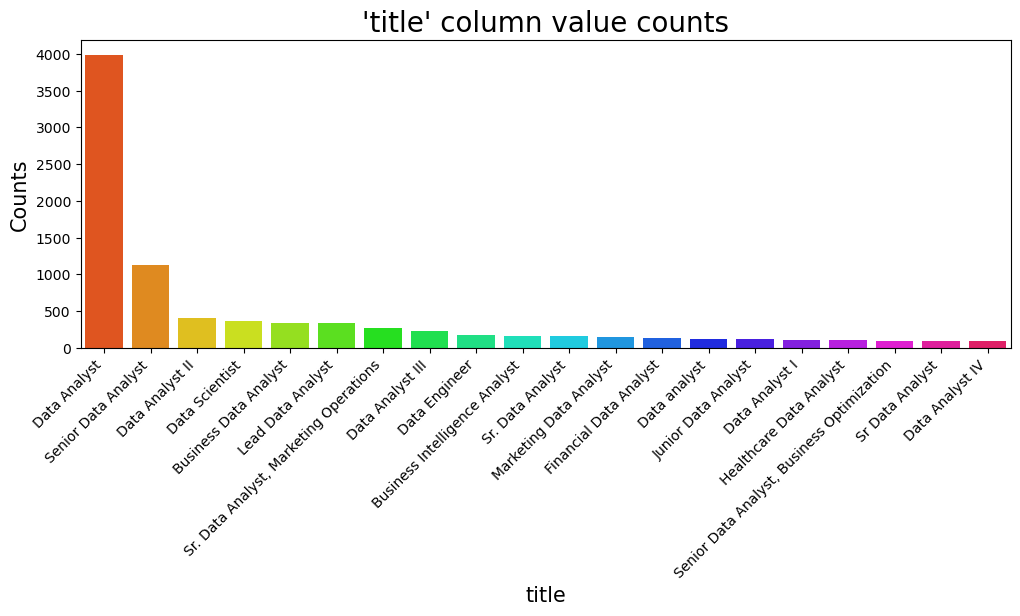

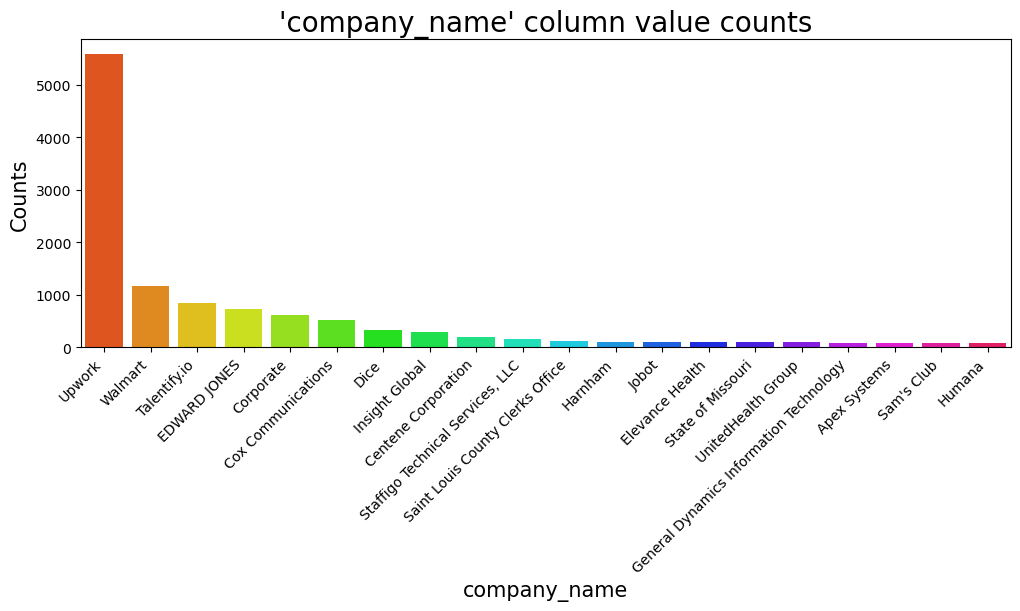

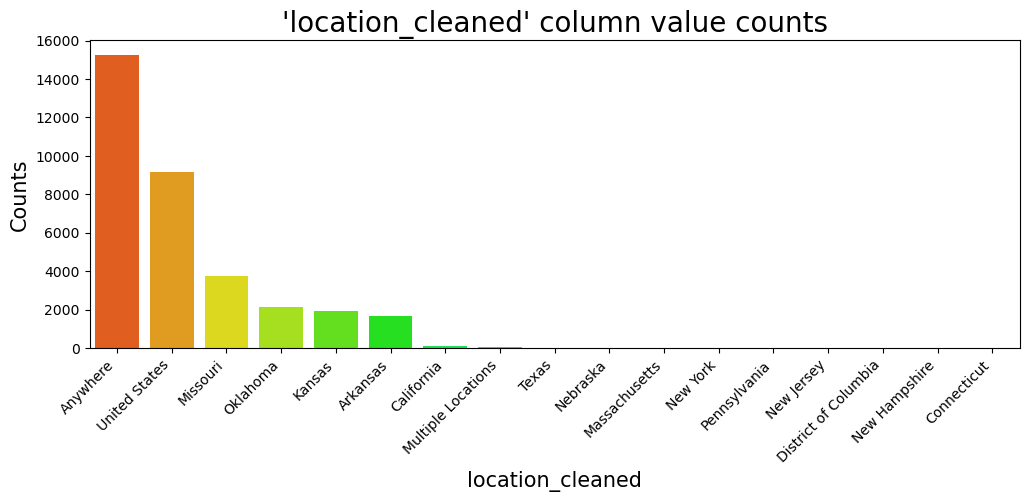

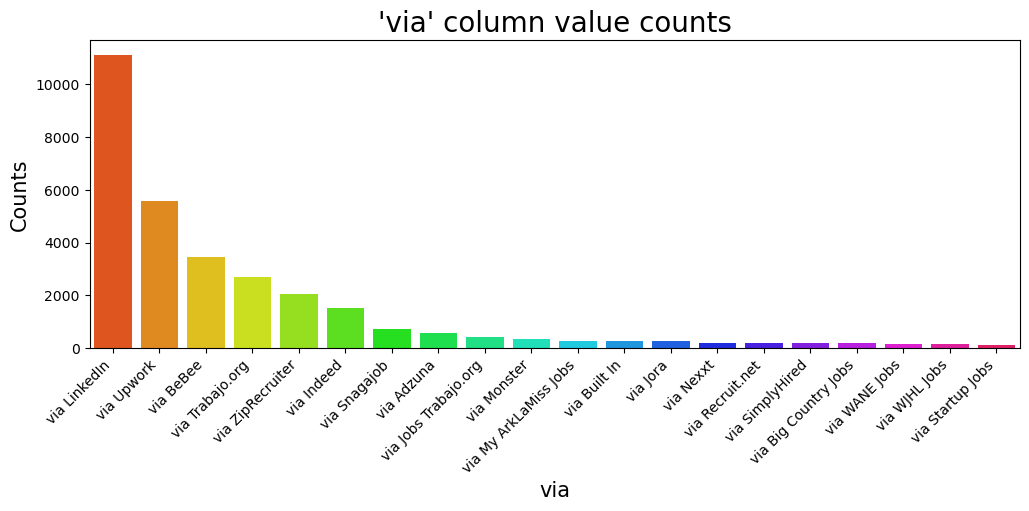

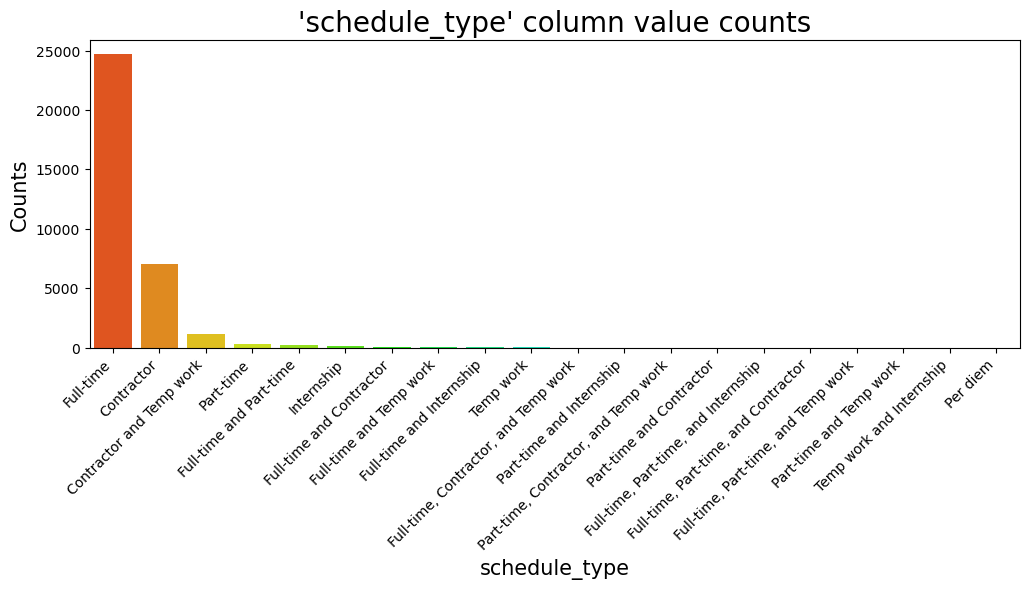

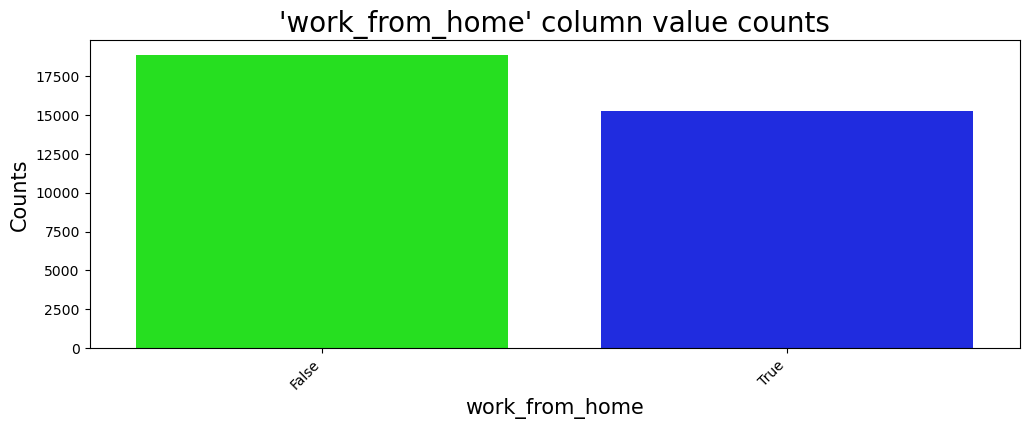

In [78]:

# List of columns to plot
columns = [
    "title",
    "company_name",
    "location_cleaned",
    "via",
    "schedule_type",
    "work_from_home",
]

# Create a plot for each column
for column in columns:
    eda_plot(jobs_df_cleaned, column)

In [79]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=20):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)

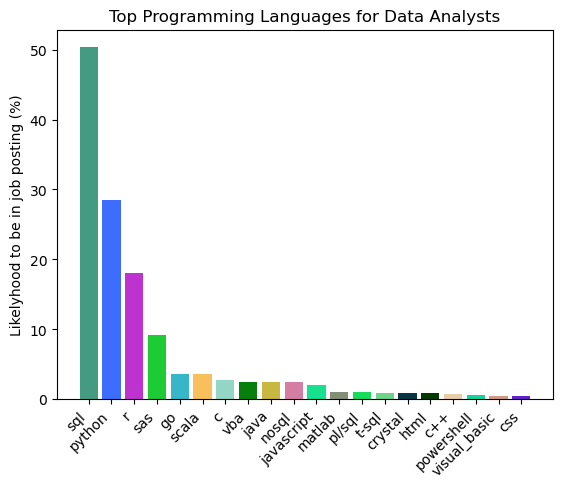

In [80]:
filtered_keywords(jobs_df_cleaned, keywords_programming, title="Top Programming Languages for Data Analysts")

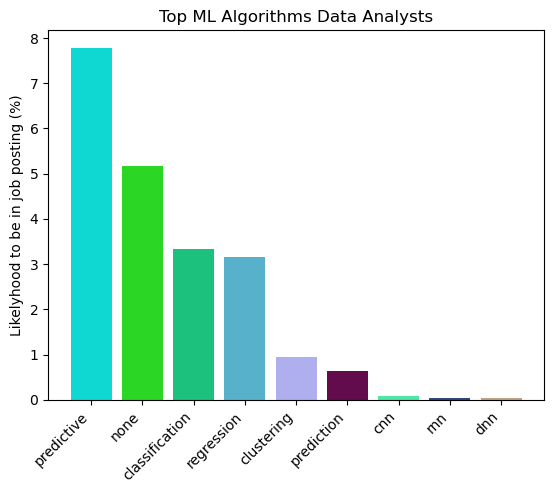

In [81]:
filtered_keywords(jobs_df_cleaned, keywords_ML_Algorithms, title="Top ML Algorithms Data Analysts")

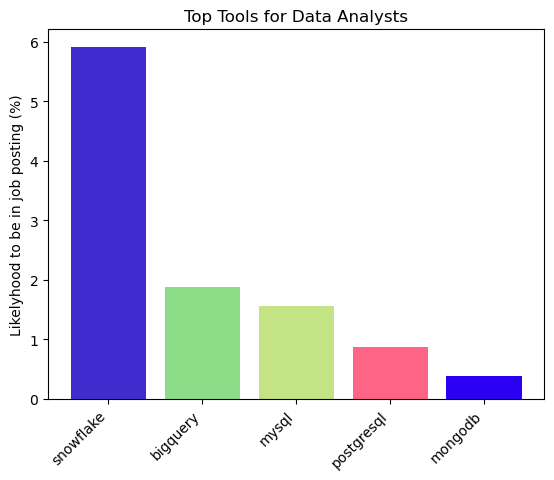

In [82]:
filtered_keywords(jobs_df_cleaned, keyword_big_data, title="Top Tools for Data Analysts")

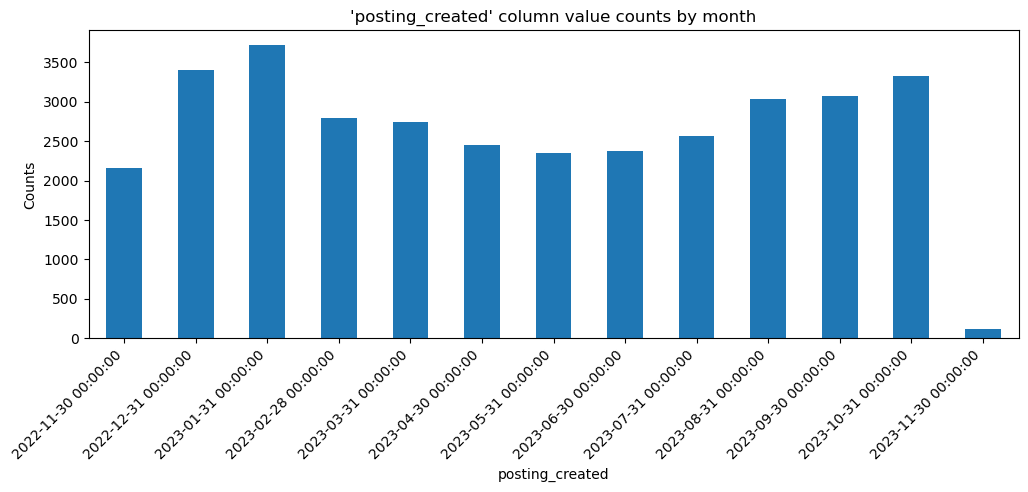

In [83]:
# Make a new df with date time index
jobs_df_cleaned_date = jobs_df_cleaned.copy()

# Make posting_created date time
jobs_df_cleaned_date['posting_created'] = pd.to_datetime(jobs_df_cleaned_date['posting_created'])

# Set index to posting_created
jobs_df_cleaned_date.set_index('posting_created', inplace=True)

# Resample 'posting_created' to monthly frequency and count the number of postings
monthly_postings = jobs_df_cleaned_date.resample('M').size()

# Plot the monthly postings
plt.figure(figsize=(12, 4))
monthly_postings.plot(kind="bar")
plt.title("'posting_created' column value counts by month")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

In [84]:
def get_top_skills(df, qty):
    """
    This function takes a DataFrame and a quantity as parameters. 
    It returns a DataFrame with the top skills by number of postings and their average yearly salary. 
    The quantity parameter determines the number of top skills to return.

    Parameters:
    df (DataFrame): The input DataFrame.
    qty (int): The number of top skills to return.

    Returns:
    DataFrame: A DataFrame with the top skills, their number of postings, and their average yearly salary.
    """
    
    # Initialize an empty list to store the skills
    skills = []
    
    # Loop over the values in the 'description_tokens' column and add them to the 'skills' list
    for val in df.description_tokens.values:
        skills.extend(val)
    
    # Get the unique skills and their counts
    skills, counts = np.unique(skills, return_counts=True)
    
    # Get the top skills and their counts
    top_skill_count = sorted(zip(list(skills), list(counts)), key=lambda x: -x[1])[:qty]
    
    # Separate the skills and counts into two lists
    top_skills = list(map(lambda x: x[0], top_skill_count))
    top_counts = list(map(lambda x: x[1], top_skill_count))
    
    # Initialize an empty list to store the average salaries
    salaries = []
    
    # Loop over the top skills and calculate their average salary
    for skill in top_skills: 
        salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].avg_salary.mean())
    
    # Create a DataFrame with the top skills, their number of postings, and their average yearly salary
    top_skills_df = pd.DataFrame({"skill": list(top_skills), "number_of_postings": top_counts,"avg_yearly_salary": list(map(round, salaries))})
    
    # Sort the DataFrame by average yearly salary in descending order
    top_skills_df = top_skills_df.sort_values("avg_yearly_salary", ascending=False)
    
    return top_skills_df

In [85]:
top_skills_df = get_top_skills(jobs_df_cleaned, 100)
top_skills_df

,skill,number_of_postings,avg_yearly_salary
89,c/c++,39,173750
60,c++,264,136896
52,s3,318,135114
54,pyspark,306,132791
70,splunk,140,131683
92,bitbucket,38,130800
65,docker,196,126619
49,airflow,331,125113
59,tensorflow,268,124352
77,perl,82,123973


In [86]:
import plotly.express as px

fig = px.treemap(top_skills_df, path=['skill'], values='number_of_postings',
                  color='avg_yearly_salary', color_continuous_scale='Blues')

fig.update_traces(hovertemplate='Skill: %{label} <br> \
Postings: %{value} <br> Average Annual salary: %{color}<extra></extra>')

fig.update_layout(
    title_text="<b style='font-size: 30px;'>Data Analytics Skills</b><br><i style='font-size: 20px;'>Salaries and Popularity</i>", 
    title_x=0.1, font_color="white",
    paper_bgcolor="#444444", 
    coloraxis_colorbar=dict(title="Average Annual Salary")
)

fig.show()

In [87]:
jobs_df_cleaned.head()

,index,title,company_name,location,via,description,extensions,job_id,time_since_posting,schedule_type,...,date_scraped,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_tokens,posting_created,title_cleaned
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,Full-time,...,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,"[r, classification, python]",2023-08-02 06:00,Data Analyst
1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,0 days 17:00:00,Contractor,...,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,"[postgresql, matlab, matplotlib, mongodb, r, p...",2023-08-02 10:00,Data Scientist
2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 12:00:00,Full-time,...,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,United States,[],2023-08-02 15:00,Data Analyst
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,Full-time,...,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,"[r, tableau, power_bi, python, perl, outlook, ...",2023-08-02 17:00,Data Analyst
4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 18:00:00,Part-time,...,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,[],2023-08-02 09:00,Data Analyst


In [88]:
# need to lowercase schedule type column values
jobs_df_cleaned['schedule_type'] = jobs_df_cleaned['schedule_type'].str.lower()


##### Full-Time Exploration

In [89]:
# need to split schedule type column for full time 
full_time = jobs_df_cleaned[jobs_df_cleaned['schedule_type'] == 'full-time']

In [90]:
full_time.shape

(24669, 22)

What positions show up the most for full time work?

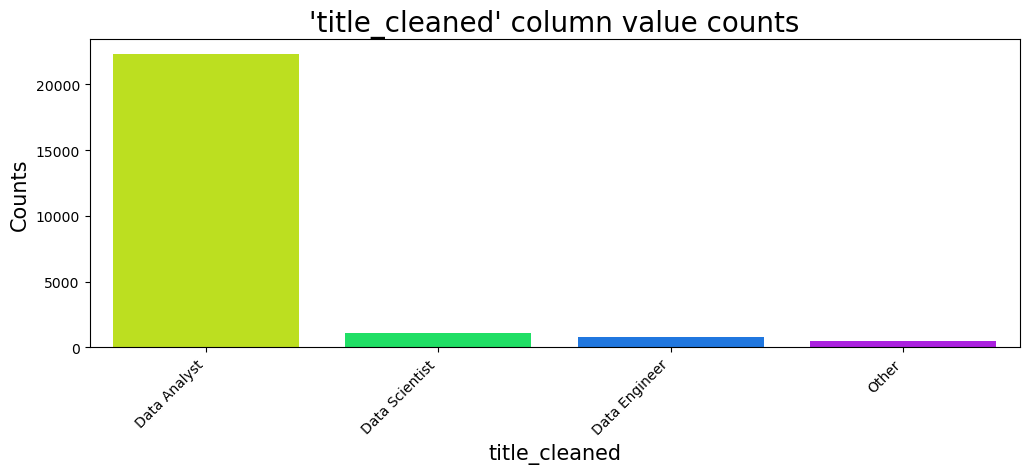

In [91]:
eda_plot(full_time, 'title_cleaned')

What companies are looking for full-time most frequently?

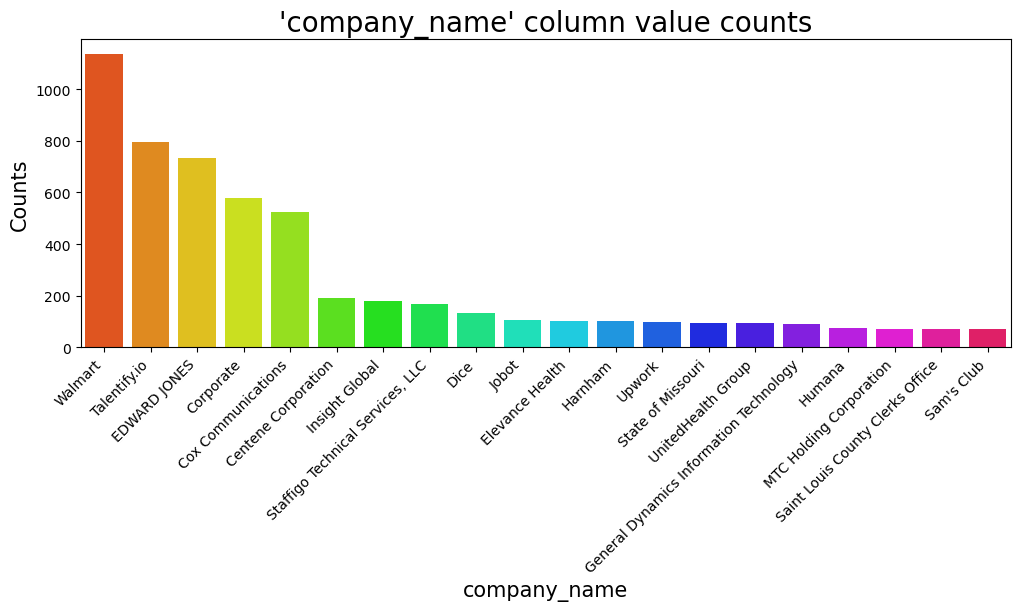

In [92]:
eda_plot(full_time, 'company_name')

Where are these full time positions showing up on job search engines?


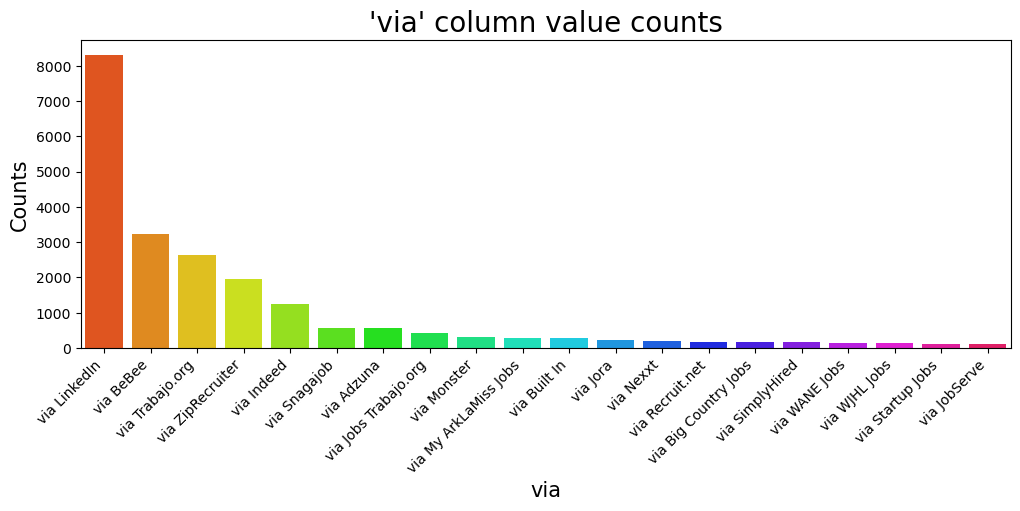

In [93]:
eda_plot(full_time, 'via')

Where do the salaries land for full time positions?


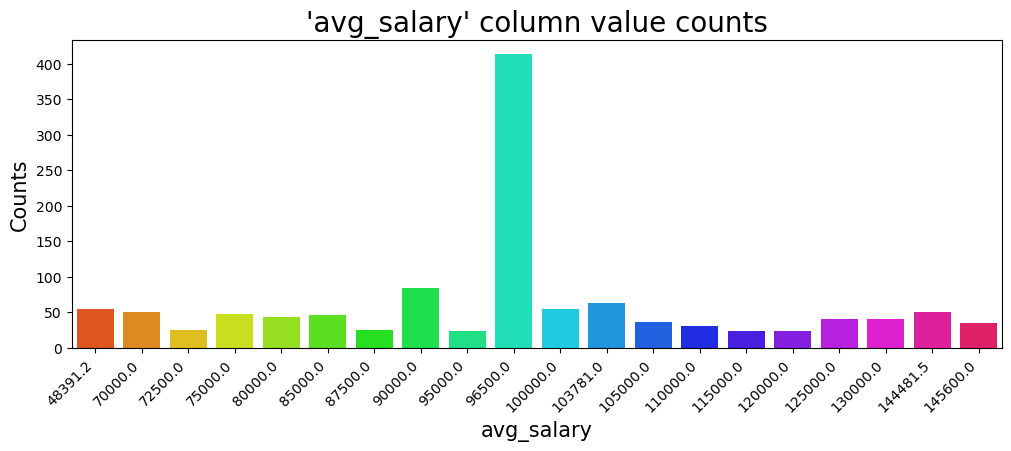

In [94]:
eda_plot(full_time, 'avg_salary')

In [95]:
full_time['avg_salary'].mean()

98364.6629434698

In [96]:
full_time_no_other = full_time[(full_time['title_cleaned'] != 'Other')]

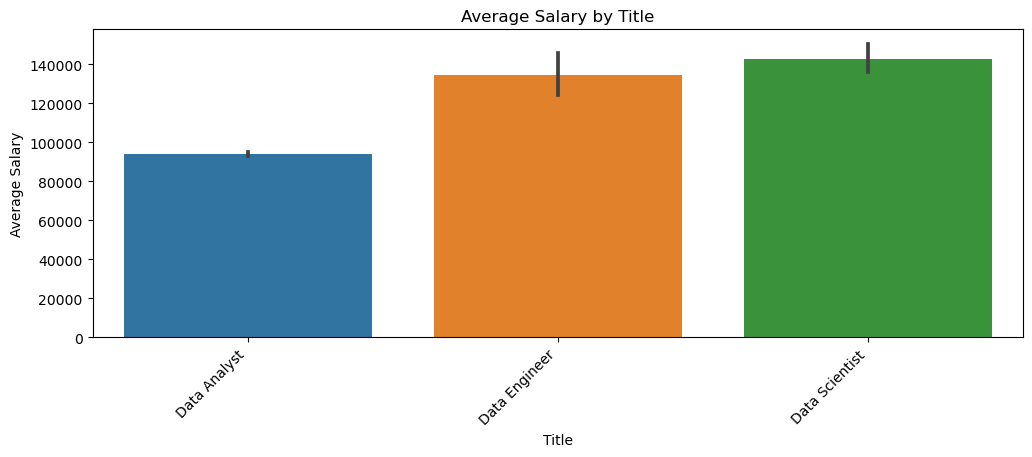

In [97]:
# now to make a graph of titles_cleaned and avg_salary
plt.figure(figsize=(12, 4))
sns.barplot(x='title_cleaned', y='avg_salary', data=full_time_no_other)
plt.title("Average Salary by Title")
plt.ylabel("Average Salary")
plt.xlabel("Title")
plt.xticks(rotation=45, ha="right")
plt.show()

In [98]:
# set pandas to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

It seems that the avg salary goes up for engineer and scientist positions

In [99]:
full_time.head()

,index,title,company_name,location,via,description,extensions,job_id,time_since_posting,schedule_type,work_from_home,salary,date_scraped,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_tokens,posting_created,title_cleaned
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,"[r, classification, python]",2023-08-02 06:00,Data Analyst
2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 12:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,United States,[],2023-08-02 15:00,Data Analyst
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,"[r, tableau, power_bi, python, perl, outlook, ...",2023-08-02 17:00,Data Analyst
5,5,Research Data Analyst 1,Oregon Health & Science University,Anywhere,via Indeed,Department Overview:\n\nThis position exists w...,"['17 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBEYXRhIEFuYWx5c3...,0 days 17:00:00,full-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,[],2023-08-02 10:00,Data Analyst
6,6,Data Analyst,Coinbase,Anywhere,via Startup Jobs,"At Coinbase, our mission is to increase econom...","['15 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 15:00:00,full-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,"[r, tableau, aws, sql, looker, python, gdpr]",2023-08-02 12:00,Data Analyst


In [100]:
full_time = create_sector_column(full_time)

In [101]:
full_time.head()

,index,title,company_name,location,via,description,extensions,job_id,time_since_posting,schedule_type,work_from_home,salary,date_scraped,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_tokens,posting_created,title_cleaned,sector
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,"[r, classification, python]",2023-08-02 06:00,Data Analyst,Finance
2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 12:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,United States,[],2023-08-02 15:00,Data Analyst,Other
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,"[r, tableau, power_bi, python, perl, outlook, ...",2023-08-02 17:00,Data Analyst,Real Estate
5,5,Research Data Analyst 1,Oregon Health & Science University,Anywhere,via Indeed,Department Overview:\n\nThis position exists w...,"['17 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBEYXRhIEFuYWx5c3...,0 days 17:00:00,full-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,[],2023-08-02 10:00,Data Analyst,Healthcare
6,6,Data Analyst,Coinbase,Anywhere,via Startup Jobs,"At Coinbase, our mission is to increase econom...","['15 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 15:00:00,full-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,"[r, tableau, aws, sql, looker, python, gdpr]",2023-08-02 12:00,Data Analyst,Finance


In [102]:
full_time_no_other = create_sector_column(full_time_no_other)

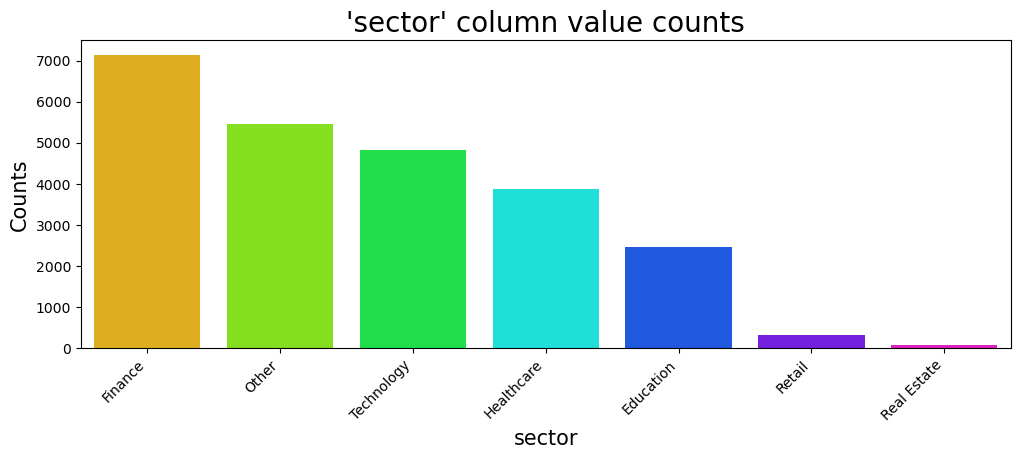

In [103]:
eda_plot(full_time_no_other, 'sector')

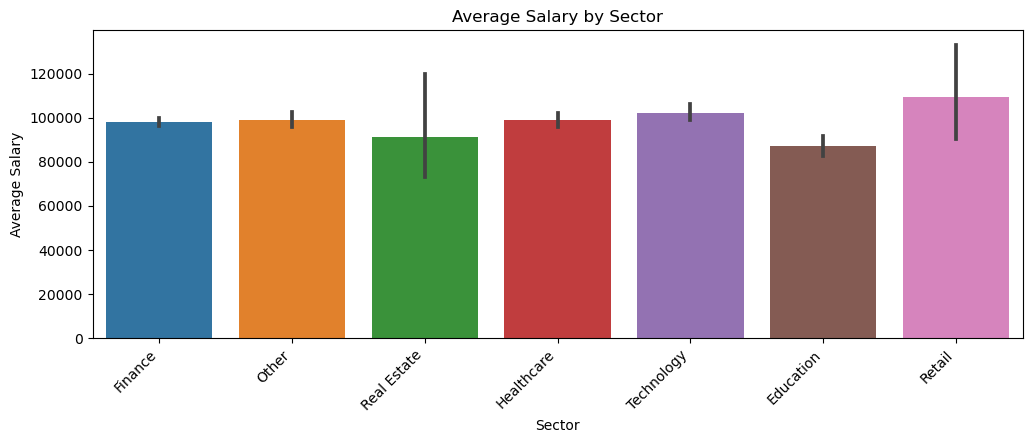

In [104]:
# make a plot of sector and avg_salary
plt.figure(figsize=(12, 4))
sns.barplot(x='sector', y='avg_salary', data=full_time_no_other)
plt.title("Average Salary by Sector")
plt.ylabel("Average Salary")
plt.xlabel("Sector")
plt.xticks(rotation=45, ha="right")
plt.show()

In [105]:
full_time_no_other.head()

,index,title,company_name,location,via,description,extensions,job_id,time_since_posting,schedule_type,work_from_home,salary,date_scraped,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_tokens,posting_created,title_cleaned,sector
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,"[r, classification, python]",2023-08-02 06:00,Data Analyst,Finance
2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 12:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,United States,[],2023-08-02 15:00,Data Analyst,Other
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,"[r, tableau, power_bi, python, perl, outlook, ...",2023-08-02 17:00,Data Analyst,Real Estate
5,5,Research Data Analyst 1,Oregon Health & Science University,Anywhere,via Indeed,Department Overview:\n\nThis position exists w...,"['17 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBEYXRhIEFuYWx5c3...,0 days 17:00:00,full-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,[],2023-08-02 10:00,Data Analyst,Healthcare
6,6,Data Analyst,Coinbase,Anywhere,via Startup Jobs,"At Coinbase, our mission is to increase econom...","['15 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 15:00:00,full-time,True,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Anywhere,"[r, tableau, aws, sql, looker, python, gdpr]",2023-08-02 12:00,Data Analyst,Finance


In [106]:
new_full_time_no_others = []
for index, row in full_time_no_other.iterrows():
    list_value = row['description_tokens']
    for item in list_value:
        new_full_time_no_other = row.copy()
        new_full_time_no_other['description_tokens'] = item
        new_full_time_no_others.append(new_full_time_no_other)

In [107]:
adjusted_df = pd.DataFrame(new_full_time_no_others)

In [108]:
adjusted_df.shape

(97435, 23)

In [109]:
adjusted_df.head()

,index,title,company_name,location,via,description,extensions,job_id,time_since_posting,schedule_type,work_from_home,salary,date_scraped,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_tokens,posting_created,title_cleaned,sector
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,r,2023-08-02 06:00,Data Analyst,Finance
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,classification,2023-08-02 06:00,Data Analyst,Finance
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,python,2023-08-02 06:00,Data Analyst,Finance
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,r,2023-08-02 17:00,Data Analyst,Real Estate
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,tableau,2023-08-02 17:00,Data Analyst,Real Estate


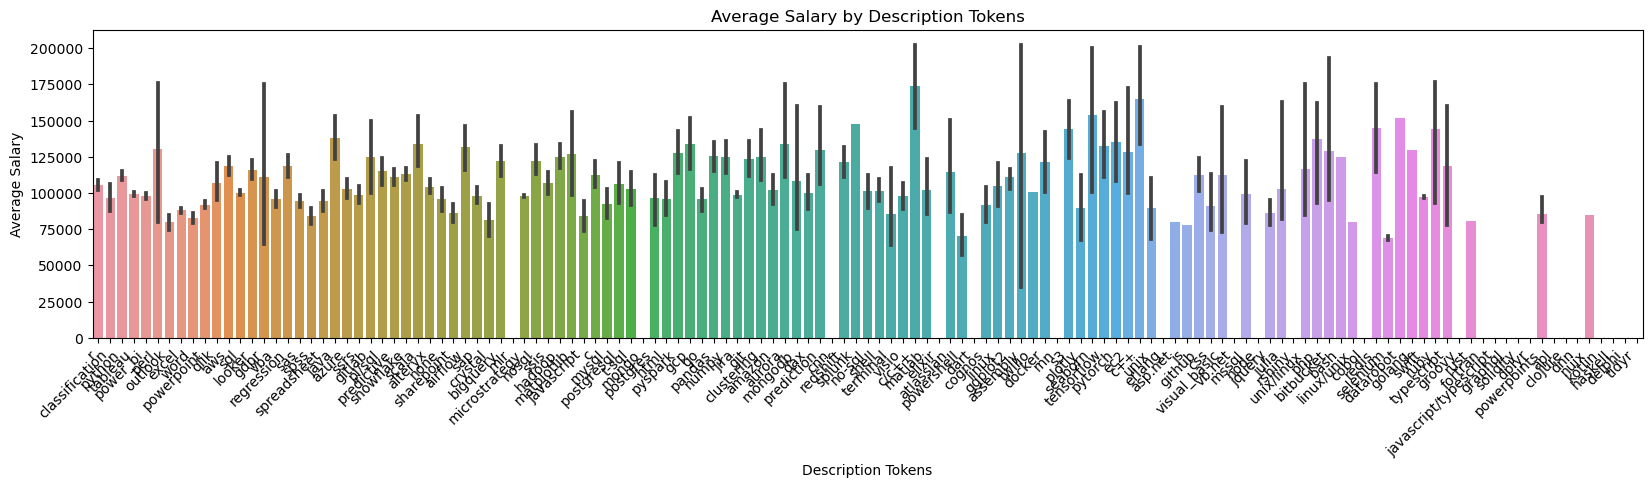

In [110]:
# make a plot of sector, description_tokens and avg_salary
plt.figure(figsize=(20, 4))
sns.barplot(x='description_tokens', y='avg_salary', data=adjusted_df)
plt.title("Average Salary by Description Tokens")
plt.ylabel("Average Salary")
plt.xlabel("Description Tokens")
plt.xticks(rotation=45, ha="right")
plt.show()

In [111]:
adjusted_df.head()


,index,title,company_name,location,via,description,extensions,job_id,time_since_posting,schedule_type,work_from_home,salary,date_scraped,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_tokens,posting_created,title_cleaned,sector
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,r,2023-08-02 06:00,Data Analyst,Finance
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,classification,2023-08-02 06:00,Data Analyst,Finance
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Oklahoma,python,2023-08-02 06:00,Data Analyst,Finance
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,r,2023-08-02 17:00,Data Analyst,Real Estate
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,full-time,False,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,Kansas,tableau,2023-08-02 17:00,Data Analyst,Real Estate


In [126]:
reminder = adjusted_df.sector.value_counts()

In [113]:
# want to separate the dataframes by sector to visualize the top 10 description tokens per sector
finance = adjusted_df[adjusted_df['sector'] == 'Finance']
healthcare = adjusted_df[adjusted_df['sector'] == 'Healthcare']
technology = adjusted_df[adjusted_df['sector'] == 'Technology']
education = adjusted_df[adjusted_df['sector'] == 'Education']
retail = adjusted_df[adjusted_df['sector'] == 'Retail']
real_estate = adjusted_df[adjusted_df['sector'] == 'Real Estate']


In [132]:
other = adjusted_df[adjusted_df['sector'] == 'Other']

In [117]:
ten_f = finance.description_tokens.value_counts().head(10)  

description_tokens
sql           4702
power_bi      3491
tableau       3343
python        3164
excel         3122
r             2175
none          1110
sas            996
scala          874
powerpoint     724
Name: count, dtype: int64

In [122]:
def top_10_description_tokens(df, title):
    grouped_df = df.groupby('description_tokens')['avg_salary'].mean().sort_values(ascending=False).head(10)

    # Plotting the data
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    grouped_df.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Description Tokens')
    plt.ylabel('Average Salary')
    plt.show()

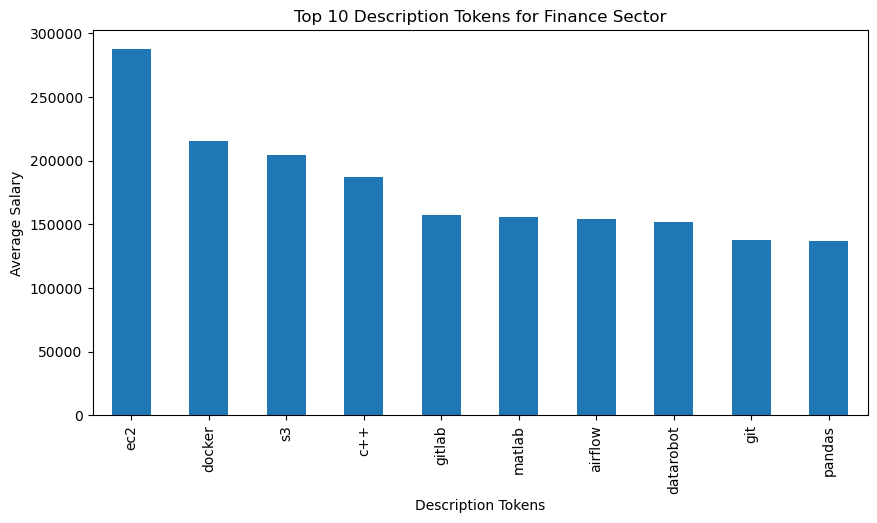

In [123]:
top_10_description_tokens(finance, 'Top 10 Description Tokens for Finance Sector')

ec2: amazon cloud
s3: amazon console
gitlab: project planning
airflow:
datarobot:


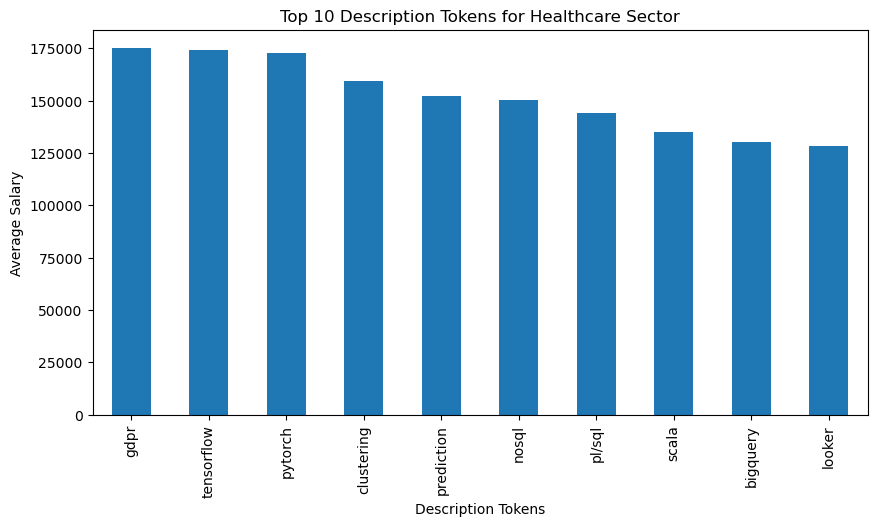

In [124]:
top_10_description_tokens(healthcare, 'Top 10 Description Tokens for Healthcare Sector')

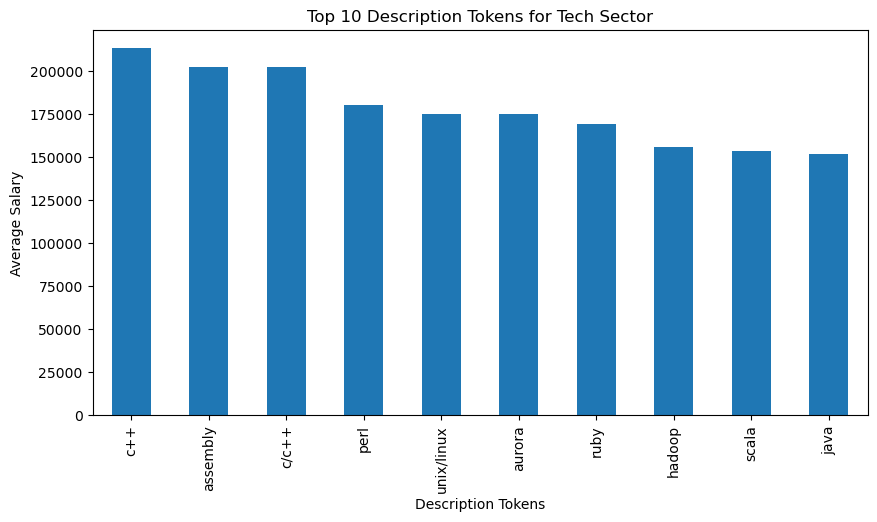

In [125]:
top_10_description_tokens(technology, 'Top 10 Description Tokens for Tech Sector')

In [127]:
reminder

sector
Finance        34760
Technology     18470
Other          17878
Healthcare     15418
Education       9236
Retail          1261
Real Estate      412
Name: count, dtype: int64

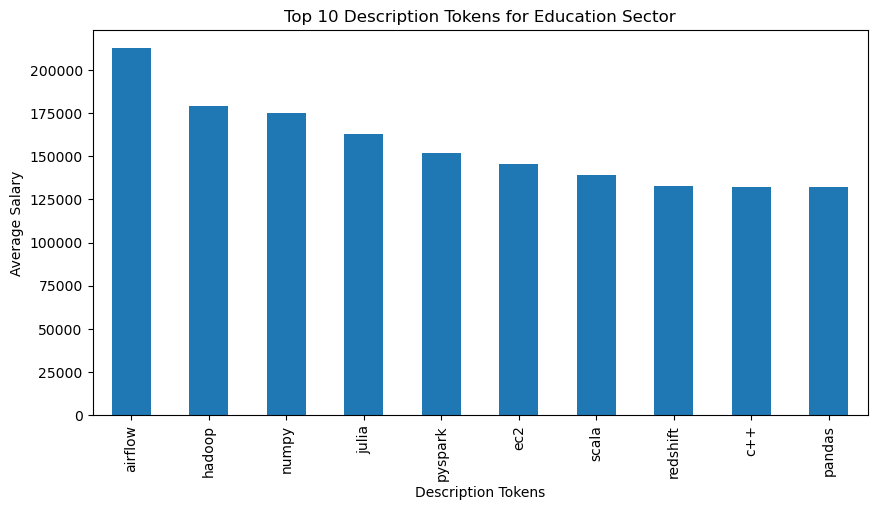

In [128]:
top_10_description_tokens(education, 'Top 10 Description Tokens for Education Sector')

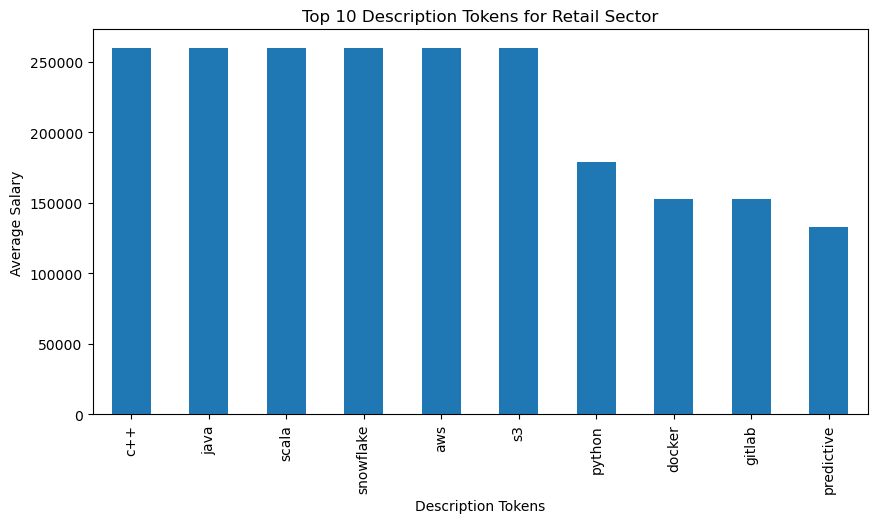

In [129]:
top_10_description_tokens(retail, 'Top 10 Description Tokens for Retail Sector')

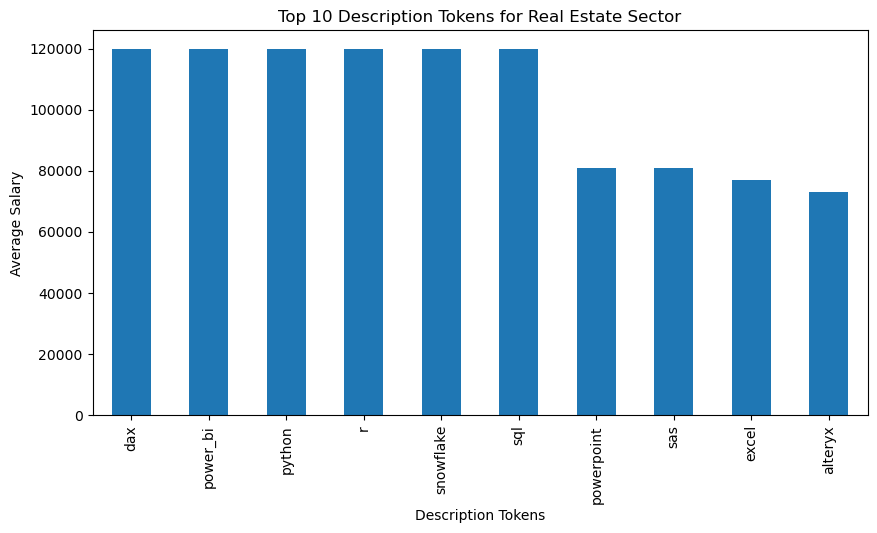

In [130]:
top_10_description_tokens(real_estate, 'Top 10 Description Tokens for Real Estate Sector')

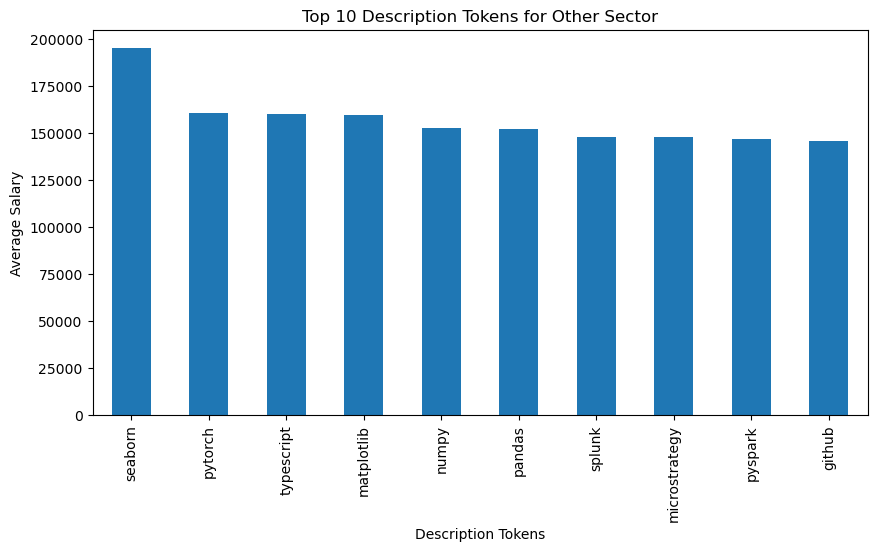

In [133]:
top_10_description_tokens(other, 'Top 10 Description Tokens for Other Sector')

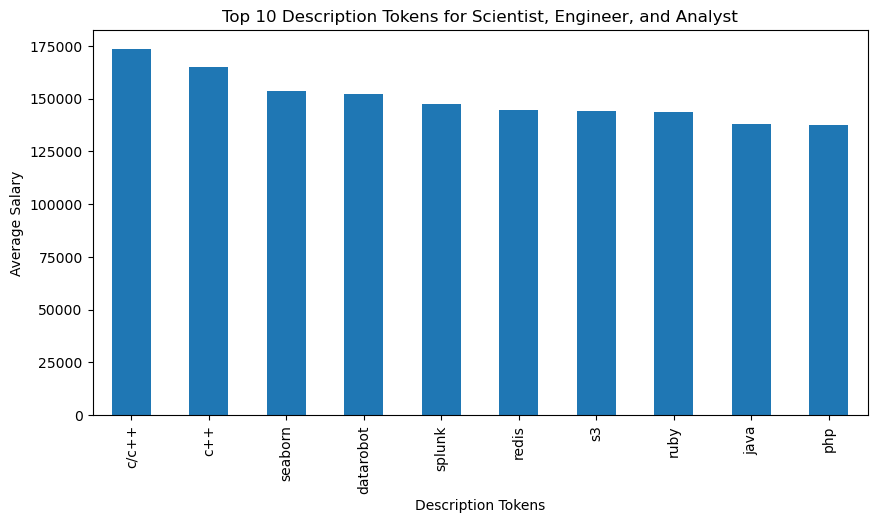

In [138]:
top_10_description_tokens(adjusted_df, 'Top 10 Description Tokens for Scientist, Engineer, and Analyst')